In [2]:
%run 01_extract_data.ipynb


## 1. QQ Plots

Here we want to create QQ Plots to understand if the features follow normal distribution or not.

In [12]:
def check_numeric_columns(wine_type_df):
    """
    Select and return the names of numeric columns from the given DataFrame.

    Parameters:
    - wine_type_df: a DataFrame containing data related to wine types.

    Returns:
    - list of column names corresponding to numeric columns.
    """
    numeric_columns = wine_type_df.select_dtypes(include=[np.number])
    column_names = numeric_columns.columns

    return column_names

def create_qq_plot(wine_type_df, folder):
    """
    Create Q-Q plot for each of the feautres of dataset, display them on one canva
    
    Parameters:
    - wine_type_df: The DataFrame containing data related to wine types.
    """
    wine_type = get_wine_str(wine_type_df)

    # Select numerical columns
    numeric_columns = check_numeric_columns(wine_type_df)

    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  
    axs = axs.flatten()

    # Q-Q plot 
    for i, column in enumerate(numeric_columns):  
        if i <= 11:
            data = wine_type_df[column]
            stats.probplot(data, dist="norm", plot=axs[i])
            axs[i].set_title(column, fontsize = 30)
            axs[i].set_xlabel('')
            axs[i].set_ylabel('')

    title = f"QQ Plots for {wine_type}"
    fig.suptitle(title, fontsize=40, weight='bold')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f'../figures/{folder}/{title}.png', bbox_inches = 'tight')
    plt.show()


In [15]:
def create_plots(plot_function, saving_folder, wine_list=wine_lists):
    """
    Create plots using a specified plot function for each item in the list od datasets.

    Parameters:
    - plot_function (callable): The function used to generate plots.
    - saving_folder (str): The folder name to save the plots.
    - wine_list (list): The list of items for which plots will be created.
    """
    # Create a folder for graphs if it doesn't exist
    if saving_folder is not None and not os.path.isdir(f'../figures/{saving_folder}'):
        os.makedirs(f'../figures/{saving_folder}')
    
    # Generate plots for each item in the list
    for item in wine_list:
        plot_function(item, saving_folder)


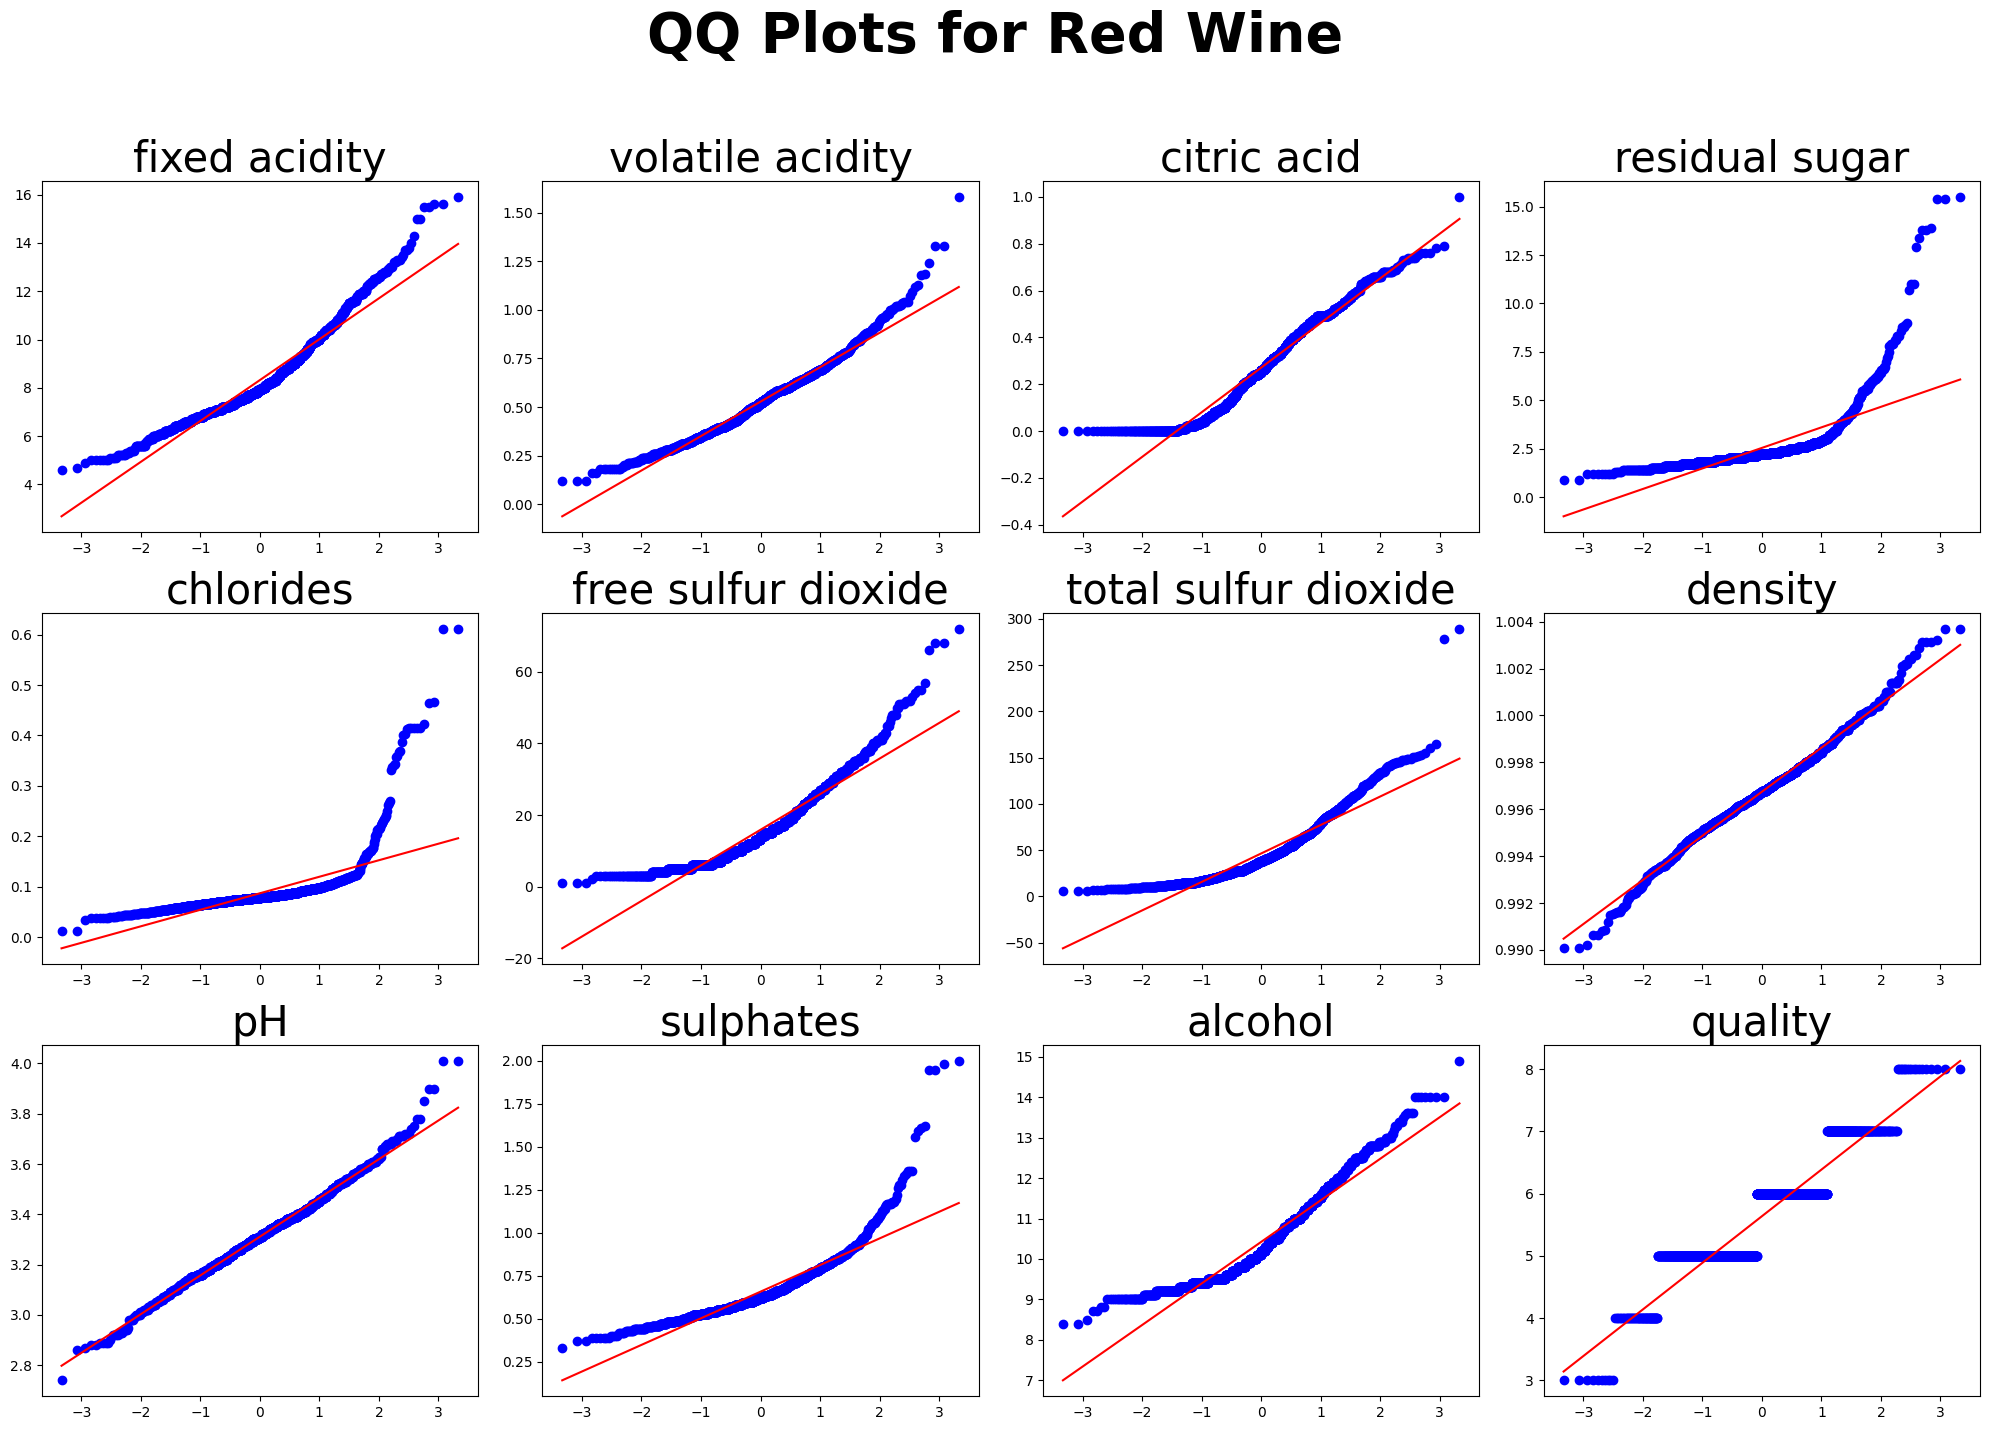

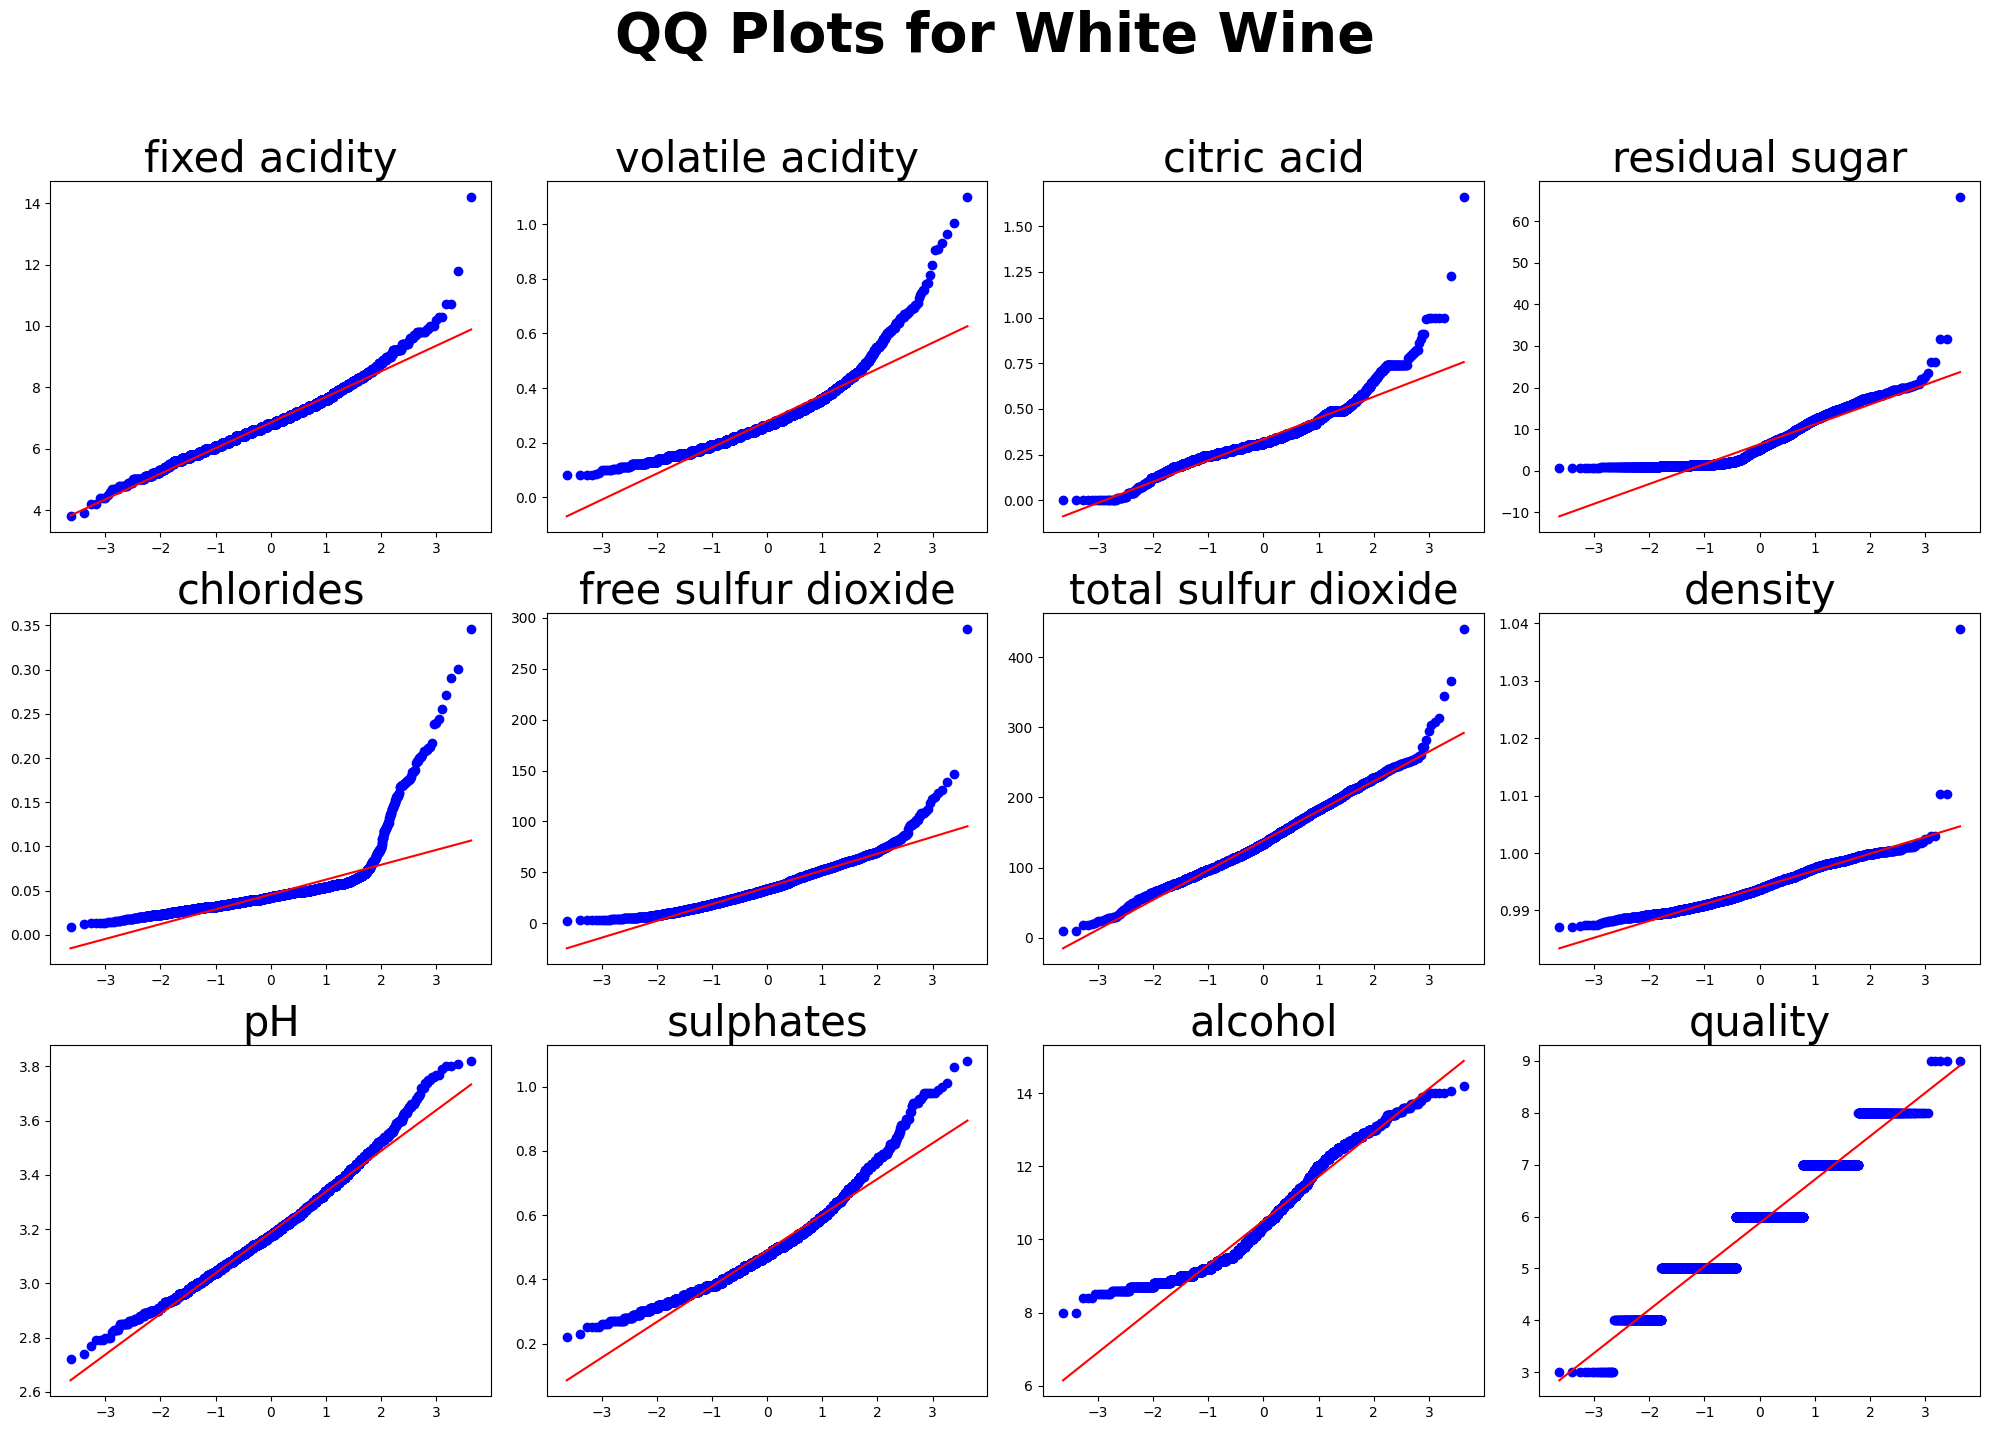

In [16]:
create_plots(create_qq_plot,'1_QQ_plots', wine_lists)

### Observations from QQ Plots of Red and White Wine Datasets:

1. **Right Skewness**:
   - **Red Wine**: `Residual Sugar` and `Alcohol` show deviations in the lower quantiles.
   - **White Wine**: Similar to Red Wine, `Residual Sugar` and `Alcohol` show deviations in the lower quantiles.

2. **Left Skewness**:
   - **Red Wine**: `Free Sulfur Dioxide`, `Chlorides`, and `Sulphates` show deviations in the upper quantiles.
   - **White Wine**: `Volatile Acidity`, `Chlorides`, and `Sulphates` show deviations in the upper quantiles.

3. **Implications for Data Processing**:
   - The observed skewness in both datasets suggests the need for normalization transformations. We will continue to calculate skewness coefficient. 
   - Techniques like logarithmic or Box-Cox transformations may be beneficial to address these deviations and improve the homogeneity of the data.

## 2. Skewness Coefficient

In [6]:
def calculate_skewness_coefficient(wine_type_df):

    print(f"\nThe skewness coefficient of {get_wine_str(wine_type_df)}: \n")

    numerical_columns = wine_type_df.select_dtypes(include=['number']).columns

    for column in numerical_columns:  
        skewness = round(wine_type_df[column].skew(),2)
        print(f"{column}: {skewness}")

In [7]:
use_function(calculate_skewness_coefficient, wine_lists)


The skewness coefficient of Red Wine: 

fixed acidity: 0.98
volatile acidity: 0.67
citric acid: 0.32
residual sugar: 4.54
chlorides: 5.68
free sulfur dioxide: 1.25
total sulfur dioxide: 1.52
density: 0.07
pH: 0.19
sulphates: 2.43
alcohol: 0.86
quality: 0.22

The skewness coefficient of White Wine: 

fixed acidity: 0.65
volatile acidity: 1.58
citric acid: 1.28
residual sugar: 1.08
chlorides: 5.02
free sulfur dioxide: 1.41
total sulfur dioxide: 0.39
density: 0.98
pH: 0.46
sulphates: 0.98
alcohol: 0.49
quality: 0.16


### Observations from the skewness coefficient

1. **White Wine**:
   - Chlorides (5.02): Highly skewness. 
   - Volatile Acidity (1.58), Citric Acid (1.28), Residual Sugar (1.08), Free Sulfur Dioxide (1.41): : Moderate skewness.
2. **Red Wine**:
   - Residual Sugar (4.54) and Chlorides (5.68): Highly skewness
   - Free Sulfur Dioxide (1.25), Total Sulfur Dioxide (1.52), Sulphates (2.43): Moderate skewness.

## 3. First Log Transformation

We are going to do log transformation for features of highly skewness and moderate skewness.

In [9]:
white_wine_log_columns = [
    'chlorides',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'free sulfur dioxide'
]

red_wine_log_columns = [
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'sulphates'
]

log_red_wine_df = df_red_wine.copy()
log_white_wine_df = df_white_wine.copy()

log_red_wine_df[red_wine_log_columns] = np.log(log_red_wine_df[red_wine_log_columns] + 0.001)
log_white_wine_df[white_wine_log_columns] = np.log(log_white_wine_df[white_wine_log_columns]+ 0.001)

log_red_wine_df.wine_type = "Red Wine(Log)"
log_white_wine_df.wine_type = "White Wine(Log)"

log_dfs = [log_red_wine_df, log_white_wine_df]


In [10]:
use_function(save_dfs_to_csv, log_dfs)

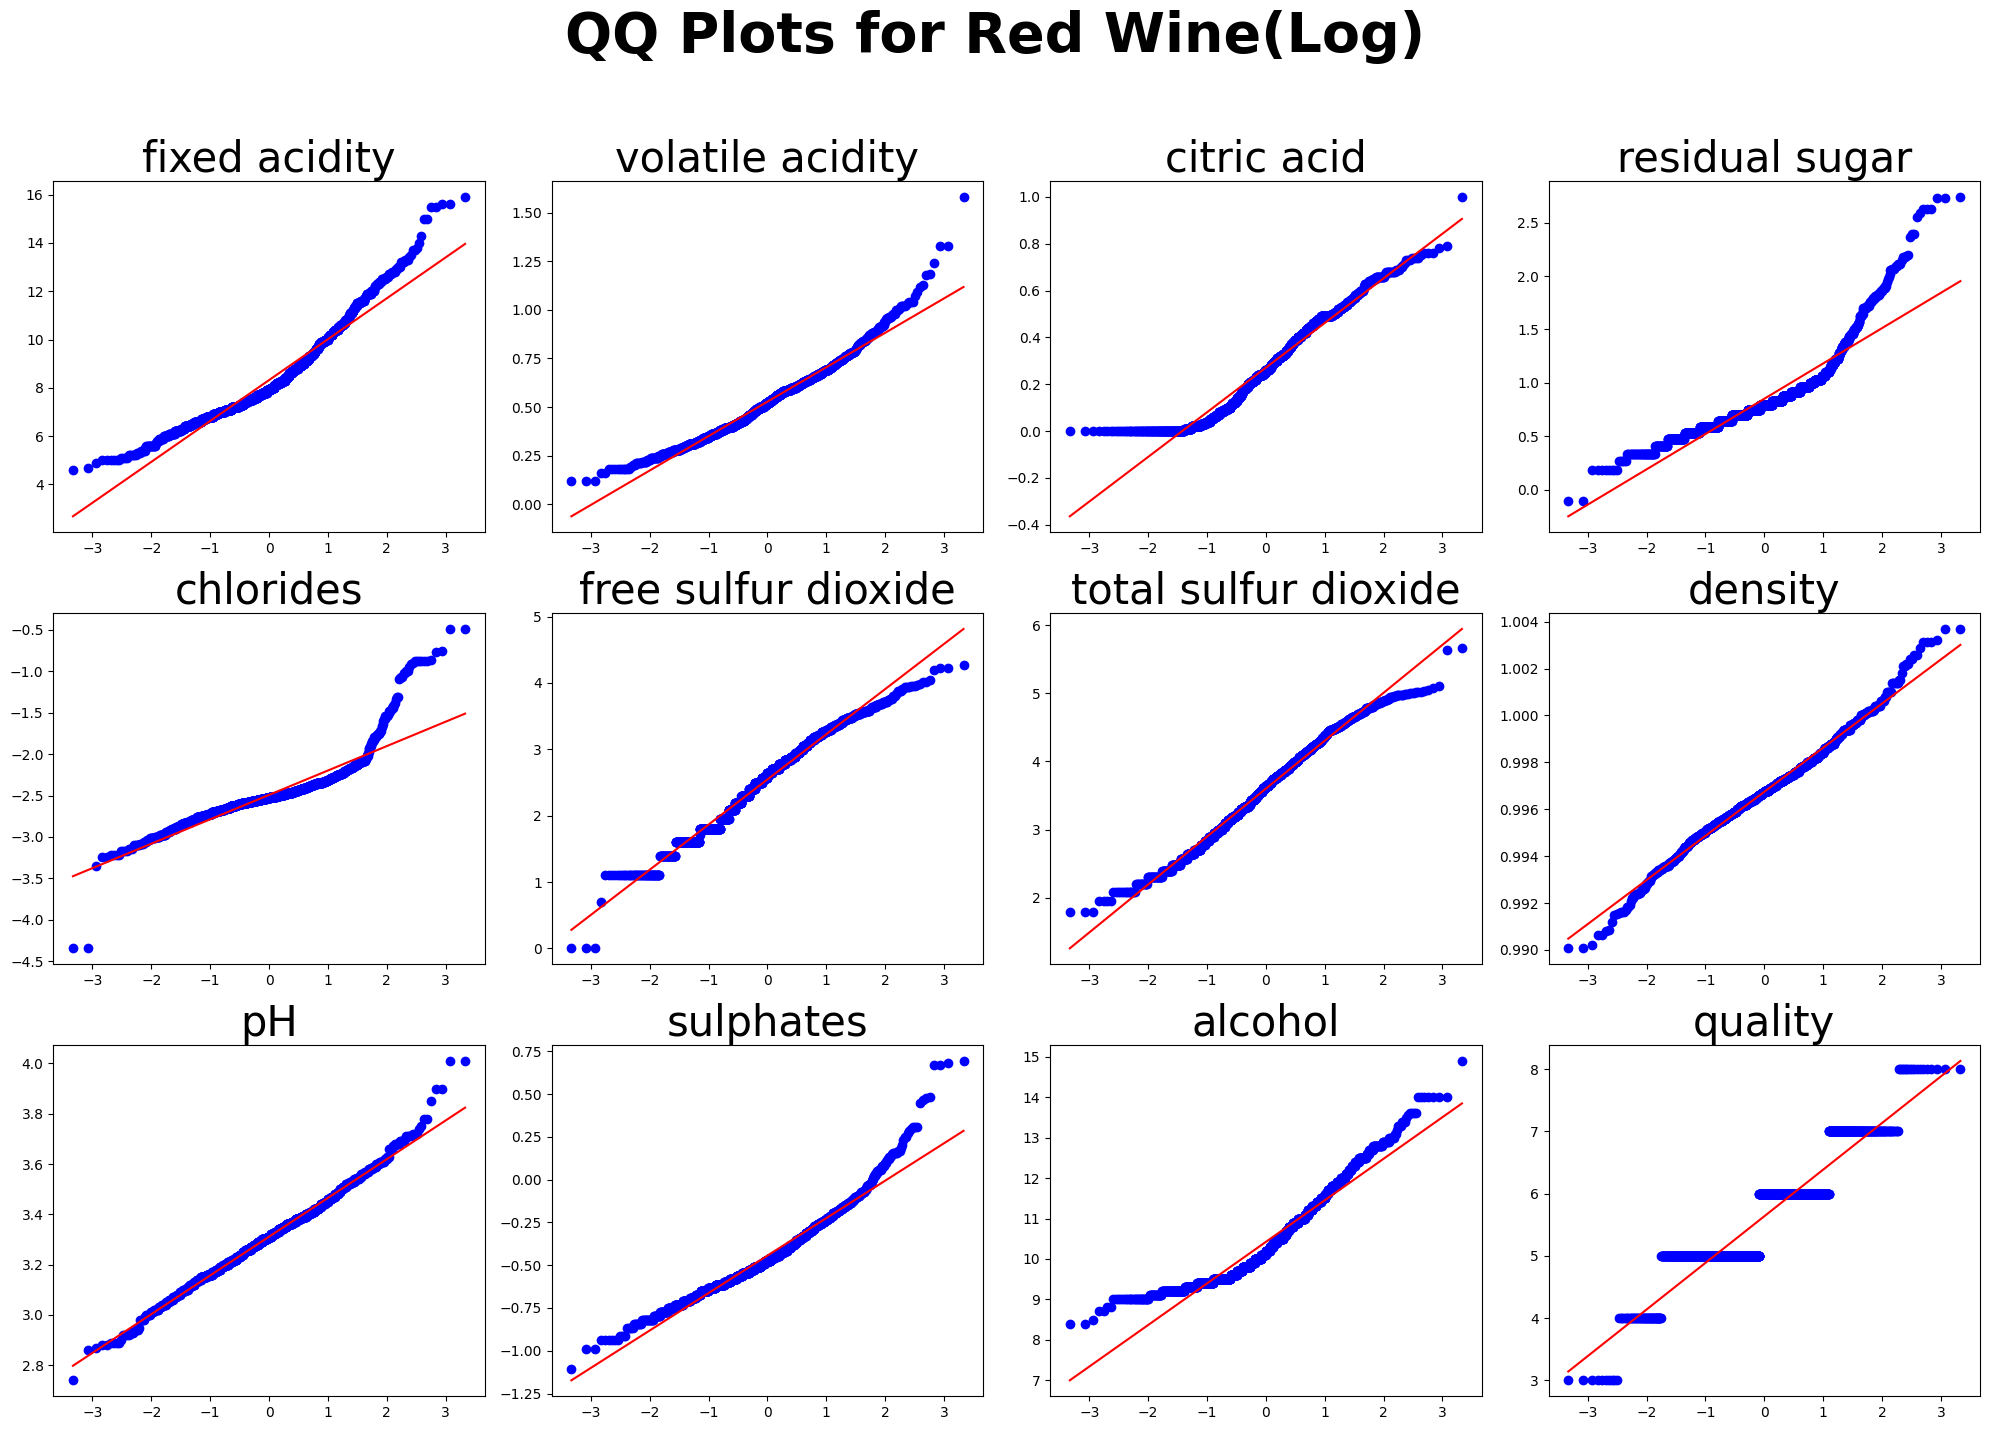

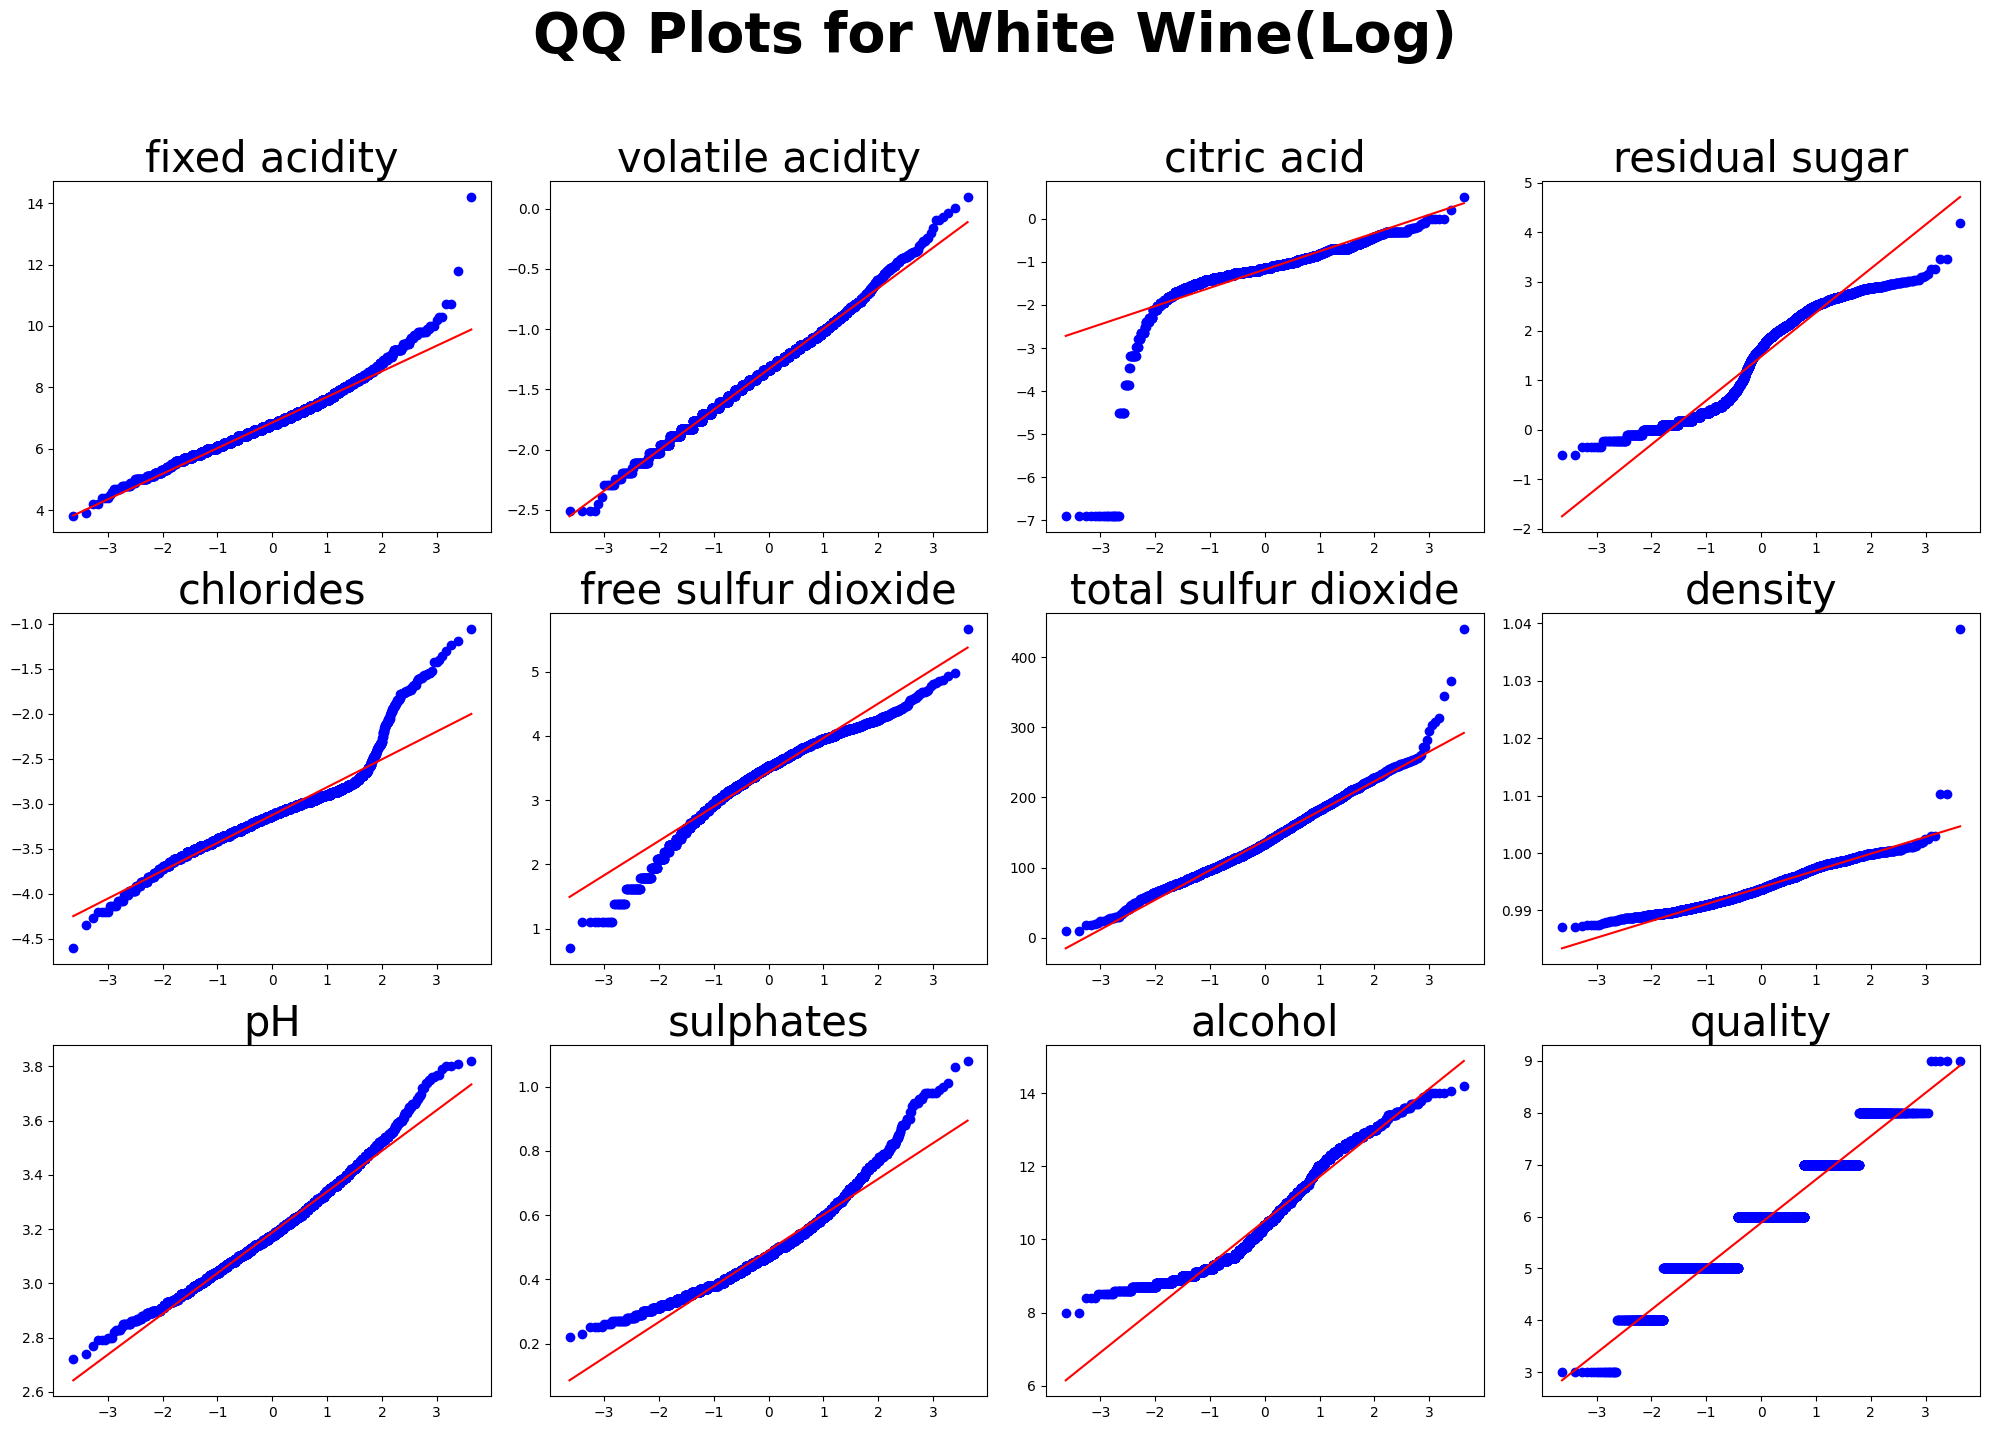


The skewness coefficient of Red Wine(Log): 

fixed acidity: 0.98
volatile acidity: 0.67
citric acid: 0.32
residual sugar: 1.81
chlorides: 1.79
free sulfur dioxide: -0.23
total sulfur dioxide: -0.08
density: 0.07
pH: 0.19
sulphates: 0.92
alcohol: 0.86
quality: 0.22

The skewness coefficient of White Wine(Log): 

fixed acidity: 0.65
volatile acidity: 0.14
citric acid: -5.56
residual sugar: -0.16
chlorides: 1.19
free sulfur dioxide: -0.94
total sulfur dioxide: 0.39
density: 0.98
pH: 0.46
sulphates: 0.98
alcohol: 0.49
quality: 0.16


In [17]:
create_plots(create_qq_plot, "2_QQ_plots_log", log_dfs)
use_function(calculate_skewness_coefficient, log_dfs)

### Observations based on the first log transformation:
1. **Red Wine (Original vs Log-Transformed):**
   - Original: `Residual sugar` 4.54, `Chlorides` 5.68.
   - Log-Transformed: `Residual sugar` 1.81, `Chlorides` 1.79.
   - `Free sulfur dioxide` changed from positive (1.25) to slightly negative skewness (-0.23).

2. **White Wine (Original vs Log-Transformed):**
   - Original: `Volatile acidity` 1.58, `Citric acid` 1.28.
   - Log-Transformed: `Volatile acidity` 0.14, `Citric acid` -5.56 (over-correction).
   - `Residual sugar` reduced from 1.08 to -0.16, `Chlorides` from 5.02 to 1.19.

3. **Minimal Impact on Some Variables:**
   - `Alcohol` and `quality` in both Red and White wines showed minimal changes (around 0.86 and 0.22 respectively).

4. **Avoid Log Transformation For:**
   - Red Wine: `Free sulfur dioxide` and `Total sulfur dioxide`.
   - White Wine: `Citric acid` and `Residual sugar` .

In [18]:
white_wine_update_log_columns = [
    'chlorides',
    'volatile acidity'
]
red_wine_update_log_columns = [
    'residual sugar',
    'chlorides'
]

log_red_update_wine_df = df_red_wine.copy()
log_white_update_wine_df = df_white_wine.copy()

log_red_update_wine_df[red_wine_update_log_columns] = np.log(log_red_update_wine_df[red_wine_update_log_columns] + 0.001)
log_white_update_wine_df[white_wine_update_log_columns] = np.log(log_white_update_wine_df[white_wine_update_log_columns]+ 0.001)

log_red_update_wine_df.wine_type = "Red Wine(Second Log)"
log_white_update_wine_df.wine_type = "White Wine(Second Log)"

log_update_dfs = [log_white_update_wine_df, log_red_update_wine_df]


In [19]:
use_function(save_dfs_to_csv, log_update_dfs)

In [ ]:
create_plots(create_qq_plot, '3_QQ_plots_log_corrected', log_update_dfs)
use_function(calculate_skewness_coefficient, log_update_dfs)

### Observations from the second log transformation:

1. **White Wine:**
   - Log transformation significantly reduced skewness in `volatile acidity` (from 1.58 to 0.14) and `chlorides` (from 5.02 to 1.19).
2. **Red Wine:**
   - Effective reduction in skewness for `residual sugar` (from 4.54 to 1.81) and `chlorides` (from 5.68 to 1.79).
3. **Conclusion:**
   - The second log transformation was successful in reducing high skewness for key variables in both Red and White Wine datasets.
